# XBGoost (exoplanets) - Classification
[ch4-gradient-boosting.ipynb](https://github.com/kyopark2014/ML-Algorithms/blob/main/xgboost/src/ch4-gradient-boosting.ipynb)

In [1]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import time

In [4]:
!wget -q https://raw.githubusercontent.com/rickiepark/handson-gb/main/Chapter04/exoplanets.csv.zip
!unzip -o exoplanets.csv.zip

Archive:  exoplanets.csv.zip
  inflating: exoplanets.csv          


In [5]:
import pandas as pd
import numpy as np

df = pd.read_csv('exoplanets.csv')
df.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


### Shuffle

In [6]:
#from sklearn.utils import shuffle
#df = shuffle(df, random_state=2)

#df.head()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5087 entries, 0 to 5086
Columns: 3198 entries, LABEL to FLUX.3197
dtypes: float64(3197), int64(1)
memory usage: 124.1 MB


In [8]:
df.isnull().sum().sum()

0

In [9]:
df['LABEL'].value_counts()

1    5050
2      37
Name: LABEL, dtype: int64

In [10]:
df.groupby('LABEL').sample(n=5)

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
482,1,7.00,4.04,4.71,-0.97,0.58,-1.92,2.43,8.72,-2.78,...,1.26,-4.58,-9.24,1.04,-10.22,2.21,17.45,6.83,-2.24,3.73
4543,1,3.19,2.85,3.05,4.39,0.77,5.54,5.63,1.46,5.35,...,3.78,-2.68,1.17,0.69,0.60,-4.10,0.68,2.76,-4.97,-5.45
2533,1,38.64,23.71,46.21,30.25,65.42,18.08,30.20,31.19,17.53,...,-27.72,-35.88,-59.77,-34.11,-55.61,-54.56,-6.36,19.35,23.35,11.13
357,1,148.46,140.79,144.86,152.93,177.72,164.40,164.94,161.13,165.58,...,62.69,75.70,85.75,89.94,73.06,89.17,37.70,25.88,-3.93,13.21
1883,1,2.92,2.79,5.86,-3.32,5.80,-2.20,0.49,0.96,-4.18,...,1.55,-0.97,-1.01,4.61,3.27,-1.35,8.41,4.45,-0.08,2.92
7,2,238.77,262.16,277.80,190.16,180.98,123.27,103.95,50.70,59.91,...,-72.48,31.77,31.77,53.48,27.88,95.30,48.86,-10.62,-112.02,-229.92
31,2,194.82,162.51,126.17,129.70,82.27,60.71,58.71,23.36,32.57,...,29.21,47.66,0.48,-28.59,-33.15,-14.98,-1.56,22.25,21.55,3.49
6,2,9.34,49.96,33.30,9.63,37.64,20.85,4.54,22.42,10.11,...,-58.56,9.93,9.93,23.50,5.28,-0.44,10.90,-11.77,-9.25,-36.69
32,2,26.96,38.98,25.99,47.28,26.29,34.08,16.66,28.27,20.99,...,35.26,-9.94,23.73,-7.54,-5.86,13.04,-5.64,-16.85,-6.18,-16.03
22,2,-48.48,-22.95,11.15,-70.04,-120.34,-150.04,-309.38,-160.73,-201.41,...,90.70,-20.01,-62.12,-45.96,-52.40,-4.93,26.74,21.43,145.30,197.20


## Split train/test dataset

In [11]:
X = df.iloc[:,1:]
y = df.iloc[:,0] - 1

## Classification Model Selection

In [12]:
from xgboost import XGBClassifier

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

kfold = StratifiedKFold(n_splits=5)

def cross_validation(model):
    start = time.time()
    
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=kfold)
    # scores = cross_val_score(model, X, y, scoring='recall', cv=kfold)
    
    print('Cross Validation:')
    print('Elased time: %0.2fs' % (time.time()-start))
    print('Accuracy:', np.round(scores, 2))
    print('Avg. Accuracy: %0.2f' % (scores.mean()))

In [13]:
cross_validation(XGBClassifier(booster='gbtree'))  # default

[13:37:54] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:38:04] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:38:15] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:38:26] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [14]:
cross_validation(XGBClassifier(booster='gblinear'))

[13:38:46] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:38:49] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:38:52] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:38:55] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [15]:
cross_validation(XGBClassifier(booster='dart', one_drop=1))

[13:39:01] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:39:34] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:40:07] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:40:40] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [16]:
from sklearn.ensemble import RandomForestClassifier

cross_validation(RandomForestClassifier())

Cross Validation:
Elased time: 39.64s
Accuracy: [0.99 0.99 0.99 0.99 0.99]
Avg. Accuracy: 0.99


## HPO

### Default

In [17]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split train/test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

# Utility function to estimate accuracy scores
def model_estimation(model):    
    start = time.time()
    y_pred = model.predict(X_test)

    from sklearn.metrics import confusion_matrix
    print('\nConfusion Matrix:')
    print(confusion_matrix(y_test, y_pred))

    from sklearn.metrics import classification_report
    print('\nClassification Report:')
    print(classification_report(y_true=y_test, y_pred = y_pred))

    from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
    print('Accuracy Score: %0.2f' % (accuracy_score(y_test,y_pred)))
    print('Precision Score: %0.2f' % (precision_score(y_test,y_pred)))
    print('Recall Score: %0.2f' % (recall_score(y_test,y_pred)))
    print('F1 Score: %0.2f' % (f1_score(y_test,y_pred)))
    print('Elapsed time: %0.2fs' % (time.time()-start)) 
    
    return accuracy_score(y_test,y_pred)

In [18]:
# default model
model = XGBClassifier(booster='gbtree', objective='binary:logistic', 
                        random_state=2, verbosity=0, use_label_encoder=False, n_jobs=-1)

model.fit(X_train, y_train)    

best_score = model_estimation(model)
best_model = model

print('\nbest_score: %0.3f' % (best_score))


Confusion Matrix:
[[1261    0]
 [  11    0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1261
           1       0.00      0.00      0.00        11

    accuracy                           0.99      1272
   macro avg       0.50      0.50      0.50      1272
weighted avg       0.98      0.99      0.99      1272

Accuracy Score: 0.99
Precision Score: 0.00
Recall Score: 0.00
F1 Score: 0.00
Elapsed time: 0.07s

best_score: 0.991


In [19]:
# Utility function to report best scores
def report(results, n_top=5):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results["rank_test_score"] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print(
                "Mean validation score: {0:.3f} (std: {1:.3f})".format(
                    results["mean_test_score"][candidate],
                    results["std_test_score"][candidate],
                )
            )
            print("Parameters: {0}".format(results["params"][candidate]))
            print("")

## HPO: Randomized Search

In [20]:
from sklearn.model_selection import RandomizedSearchCV

def randomized_search(params, runs=20): 
    xgb = XGBClassifier(booster='gbtree', objective='binary:logistic', 
                        random_state=2, verbosity=0, use_label_encoder=False, n_jobs=-1)
    
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)
    
    rand_clf = RandomizedSearchCV(xgb, params, cv=kfold, n_iter=runs, n_jobs=-1, random_state=2, scoring='accuracy')
    
    rand_clf.fit(X_train, y_train)    
    
    best_model = rand_clf.best_estimator_    
    
    print("best parameter:", rand_clf.best_params_)    
    print("best score: {:.3f}".format(rand_clf.best_score_))

    # print("rand_clf.cv_results_: ", rand_clf.cv_results_)
    report(rand_clf.cv_results_)
    
    return best_model

In [25]:
import time
start = time.time()

randomized_model = randomized_search(
    params={
        'n_estimators':[50, 100, 200],
        'learning_rate':[0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.8],
        'max_depth':[1, 2, 3, 5, 6, 8],
        'gamma':[0, 0.01, 0.1, 0.5, 0.7, 1, 2],
        'min_child_weight':[5, 10, 15, 20, 30],
        'subsample':[0.5, 0.7, 0.8, 0.9, 1],
        'colsample_bytree':[0.2, 0.5, 0.7, 0.8, 0.9, 1],  
        }, 
    runs=20)

print('\nElapsed time: %0.2fs' % (time.time()-start))

best parameter: {'subsample': 0.7, 'n_estimators': 100, 'min_child_weight': 5, 'max_depth': 3, 'learning_rate': 0.5, 'gamma': 0.5, 'colsample_bytree': 0.8}
best score: 0.958
Model with rank: 1
Mean validation score: 0.958 (std: 0.018)
Parameters: {'subsample': 0.7, 'n_estimators': 100, 'min_child_weight': 5, 'max_depth': 3, 'learning_rate': 0.5, 'gamma': 0.5, 'colsample_bytree': 0.8}

Model with rank: 2
Mean validation score: 0.955 (std: 0.009)
Parameters: {'subsample': 0.7, 'n_estimators': 100, 'min_child_weight': 5, 'max_depth': 2, 'learning_rate': 0.8, 'gamma': 0.01, 'colsample_bytree': 0.5}

Model with rank: 3
Mean validation score: 0.953 (std: 0.015)
Parameters: {'subsample': 0.8, 'n_estimators': 200, 'min_child_weight': 15, 'max_depth': 2, 'learning_rate': 0.2, 'gamma': 0.1, 'colsample_bytree': 0.5}

Model with rank: 3
Mean validation score: 0.953 (std: 0.013)
Parameters: {'subsample': 0.9, 'n_estimators': 50, 'min_child_weight': 10, 'max_depth': 8, 'learning_rate': 0.2, 'gamma':

In [26]:
print(best_model.get_params())

{'objective': 'binary:logistic', 'use_label_encoder': False, 'base_score': 0.5, 'booster': 'gbtree', 'callbacks': None, 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'gamma': 0, 'gpu_id': -1, 'grow_policy': 'depthwise', 'importance_type': None, 'interaction_constraints': '', 'learning_rate': 0.300000012, 'max_bin': 256, 'max_cat_to_onehot': 4, 'max_delta_step': 0, 'max_depth': 6, 'max_leaves': 0, 'min_child_weight': 1, 'missing': nan, 'monotone_constraints': '()', 'n_estimators': 100, 'n_jobs': -1, 'num_parallel_tree': 1, 'predictor': 'auto', 'random_state': 2, 'reg_alpha': 0, 'reg_lambda': 1, 'sampling_method': 'uniform', 'scale_pos_weight': 1, 'subsample': 1, 'tree_method': 'exact', 'validate_parameters': 1, 'verbosity': 0}


In [ ]:
score = model_estimation(randomized_model)
print('\nscore: %0.3f' % (score))  

if(score > best_score):
    best_score = score
    best_model = model

    print('best_score: %0.3f' % (best_score))  

## HPO: Bayesian Optimization 

In [21]:
from bayes_opt import BayesianOptimization

def xgbc_cv(n_estimators, learning_rate, max_depth, gamma, min_child_weight, subsample, colsample_bytree, ):
    xgb = XGBClassifier(booster='gbtree', objective='binary:logistic', 
                        n_estimators=int(n_estimators),
                        learning_rate=learning_rate,
                        max_depth=int(max_depth),
                        gamma=gamma,
                        min_child_weight=min_child_weight,
                        subsample=subsample,
                        colsample_bytree=colsample_bytree,
                        random_state=2, verbosity=0, use_label_encoder=False, n_jobs=-1)

    xgb.fit(X_train, y_train)    

    y_pred = xgb.predict(X_test)

    score = accuracy_score(y_pred, y_test)

    print('score=', score)

    return score

hyperparameter_space = {
    'n_estimators': (50, 800),
    'learning_rate': (0.01, 1.0),
    'max_depth': (1, 8),
    'gamma' : (0.01, 1),
    'min_child_weight': (1, 20),
    'subsample': (0.5, 1),
    'colsample_bytree': (0.1, 1)
}

optimizer = BayesianOptimization(f=xgbc_cv, pbounds=hyperparameter_space, random_state=2, verbose=0)

#gp_params = {"alpha": 1e-10}
#optimizer.maximize(init_points=3,n_iter=10,acq='ucb', kappa= 3, **gp_params)    

#optimizer.maximize(init_points=2, n_iter=10)
optimizer.maximize(init_points=3, n_iter=5, acq='ei')


optimizer.max

score= 0.9913522012578616
score= 0.9913522012578616
score= 0.9913522012578616


ValueError: array must not contain infs or NaNs

In [22]:
best_params = optimizer.max['params']

## Evaluation

In [23]:
cross_validation(best_model)   
model_estimation(best_model)    

Cross Validation:
Elased time: 51.25s
Accuracy: [0.99 0.99 0.99 0.99 0.99]
Avg. Accuracy: 0.99

Confusion Matrix:
[[1261    0]
 [  11    0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1261
           1       0.00      0.00      0.00        11

    accuracy                           0.99      1272
   macro avg       0.50      0.50      0.50      1272
weighted avg       0.98      0.99      0.99      1272

Accuracy Score: 0.99
Precision Score: 0.00
Recall Score: 0.00
F1 Score: 0.00
Elapsed time: 0.07s


0.9913522012578616

## Feature Importances

Feature Importances:
[0.0015472  0.00016249 0.         ... 0.         0.         0.        ]
Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com


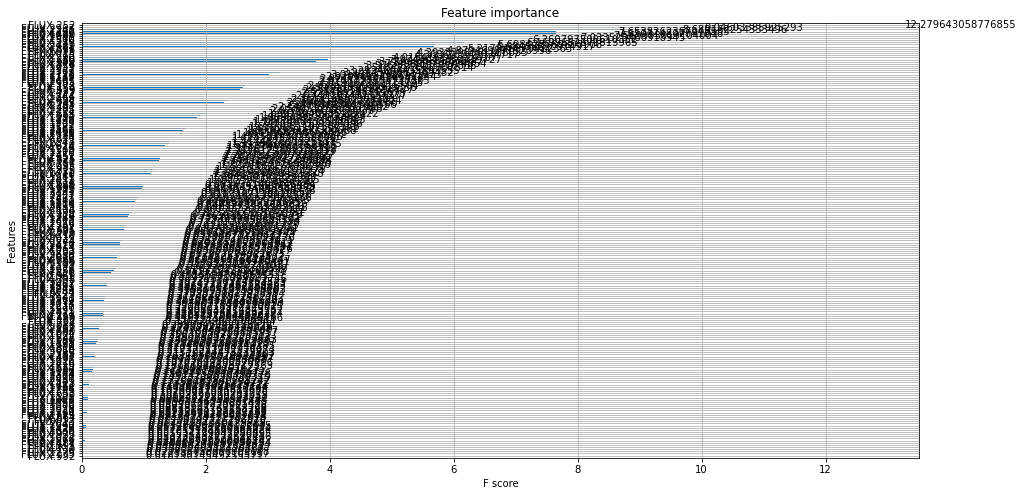

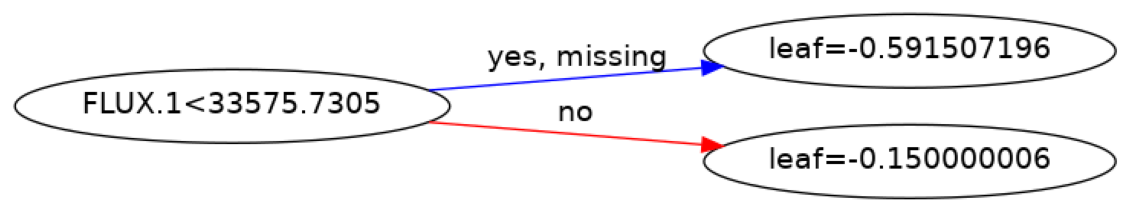

In [24]:
print('Feature Importances:')
print(best_model.feature_importances_)

import xgboost as xgb

feature_data = xgb.DMatrix(X_test)
best_model.get_booster().feature_names = feature_data.feature_names
best_model.get_booster().feature_types = feature_data.feature_types

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 8))
xgb.plot_importance(best_model, ax=ax, importance_type='gain')

!pip install graphviz

xgb.plot_tree(best_model, num_trees=0, rankdir='LR')

fig = plt.gcf()
fig.set_size_inches(20, 10)
plt.show()

### Data analysis

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

X = df.iloc[:,1:]
y = df.iloc[:,0] - 1

def light_plot(index):
    y_vals = X.iloc[index]
    x_vals = np.arange(len(y_vals))
    plt.figure(figsize=(15,8))
    plt.xlabel('Number of Observations')
    plt.ylabel('Light Flux')
    plt.title('Light Plot ' + str(index), size=15)
    plt.plot(x_vals, y_vals)
    plt.show()

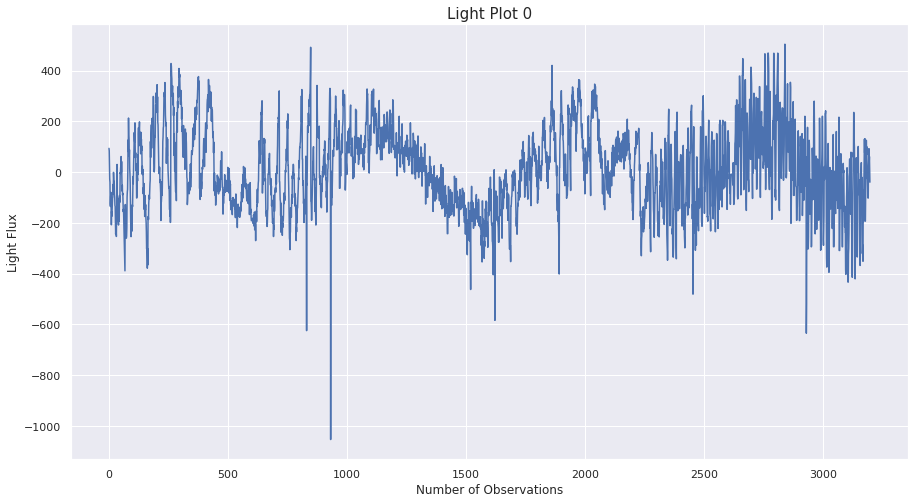

In [26]:
light_plot(0)

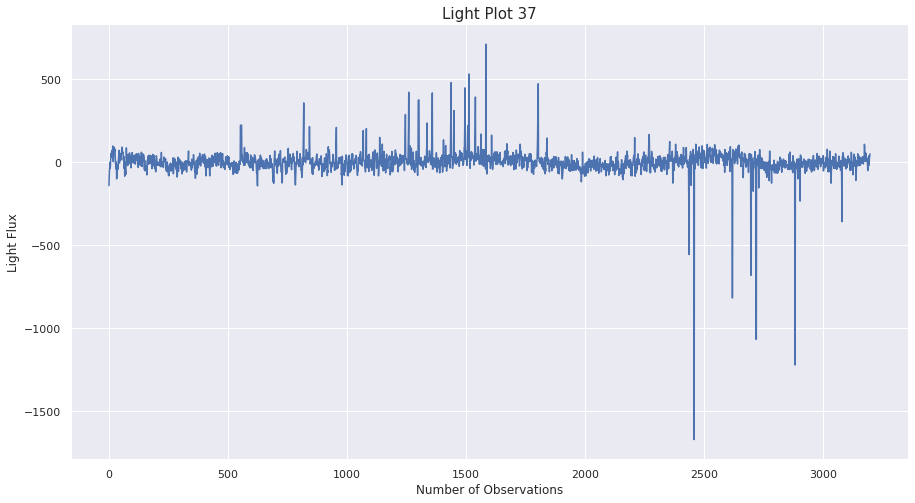

In [27]:
light_plot(37)

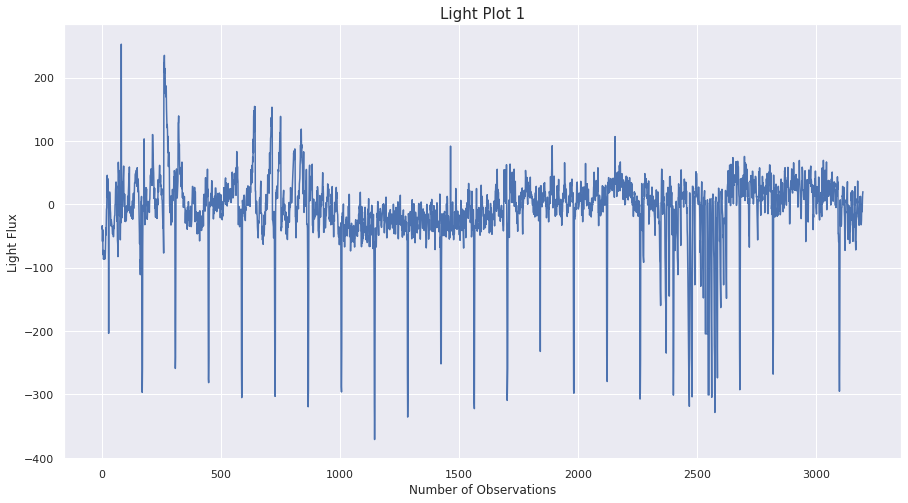

In [28]:
light_plot(1)

### Resampling

In [29]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import classification_report

def xgb_clf(model, nrows):
    df = pd.read_csv('exoplanets.csv', nrows=nrows)
    
    X = df.iloc[:,1:]
    y = df.iloc[:,0] - 1

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_pred, y_test)
    print('Accuracy: %0.2f' % (accuracy))
    
    recall = recall_score(y_test, y_pred)
    print('Recall: %0.2f' % (recall))
    
    # print(confusion_matrix(y_test, y_pred))    
    print(classification_report(y_test, y_pred))    
        
    return recall

### Undersampling

In [30]:
recall = xgb_clf(XGBClassifier(), nrows=800)
print('Recall: %0.2f' % (recall))

Accuracy: 0.95
Recall: 0.10
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       190
           1       0.50      0.10      0.17        10

    accuracy                           0.95       200
   macro avg       0.73      0.55      0.57       200
weighted avg       0.93      0.95      0.93       200

Recall: 0.10


In [31]:
recall = xgb_clf(XGBClassifier(), nrows=200)
print('Recall: %0.2f' % (recall))

Accuracy: 0.84
Recall: 0.38
              precision    recall  f1-score   support

           0       0.82      1.00      0.90        37
           1       1.00      0.38      0.56        13

    accuracy                           0.84        50
   macro avg       0.91      0.69      0.73        50
weighted avg       0.87      0.84      0.81        50

Recall: 0.38


In [32]:
xgb_clf(XGBClassifier(), nrows=74)

Accuracy: 0.63
Recall: 0.55
              precision    recall  f1-score   support

           0       0.55      0.75      0.63         8
           1       0.75      0.55      0.63        11

    accuracy                           0.63        19
   macro avg       0.65      0.65      0.63        19
weighted avg       0.66      0.63      0.63        19



0.5454545454545454

### Oversampling

In [33]:
df_train = pd.merge(y_train, X_train, left_index=True, right_index=True)

In [34]:
newdf = pd.DataFrame(np.repeat(df_train[df_train['LABEL']==1].values,9,axis=0))
newdf.columns = df_train.columns
df_train_resample = pd.concat([df_train, newdf])

df_train_resample['LABEL'].value_counts()

0.0    3789
1.0     260
Name: LABEL, dtype: int64

In [35]:
df_train_resample.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
2358,0.0,-188.30,-212.77,-221.72,-188.92,-189.23,-124.94,-113.06,-105.84,-81.58,...,-253.64,-267.41,-269.56,-256.05,-217.06,-207.55,-111.59,-49.17,9.59,37.48
527,0.0,29.16,29.76,20.86,26.43,22.71,13.50,9.77,15.67,11.58,...,-9.95,-15.47,-16.44,-9.05,-0.63,-14.11,-17.09,-21.41,-11.93,-18.49
1061,0.0,5.27,1.55,-3.50,-7.32,-3.34,-17.52,-4.75,-9.30,-9.19,...,-7.10,-13.99,-8.26,-5.36,1.41,-2.35,-11.07,-2.45,4.02,-7.32
2085,0.0,262.53,269.00,248.65,256.60,260.04,252.23,246.30,241.87,237.41,...,-6.48,-11.60,-7.46,5.90,0.43,1.66,28.04,30.76,33.35,36.42
4456,0.0,2.21,-0.65,-3.73,-1.16,-1.32,-4.14,4.05,2.66,1.12,...,6.37,6.57,9.66,1.15,7.57,5.64,4.84,3.78,4.92,7.56


In [36]:
X_train_resample = df_train_resample.iloc[:,1:]
y_train_resample = df_train_resample.iloc[:,0]

In [37]:
model = XGBClassifier()

model.fit(X_train_resample, y_train_resample)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_pred, y_test)
print('Accuracy: %0.2f' % (accuracy))
    
recall = recall_score(y_test, y_pred)
print('Recall: %0.2f' % (recall))
    
# print(confusion_matrix(y_test, y_pred))    
print(classification_report(y_test, y_pred)) 

Accuracy: 0.99
Recall: 0.00
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1261
           1       0.00      0.00      0.00        11

    accuracy                           0.99      1272
   macro avg       0.50      0.50      0.50      1272
weighted avg       0.98      0.99      0.99      1272



### Tunning

In [38]:
df['LABEL'] = df['LABEL'].replace(1, 0)
df['LABEL'] = df['LABEL'].replace(2, 1)

df['LABEL'].value_counts()

0    5050
1      37
Name: LABEL, dtype: int64

In [39]:
df.groupby('LABEL').sample(n=5)

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
142,0,-38.40,-40.44,-22.29,-27.12,-22.19,-26.22,-39.01,-6.16,-15.46,...,-16.63,-35.66,-50.42,-35.85,-64.63,-64.43,-11.77,22.50,9.56,5.74
1928,0,1.55,18.45,-4.49,1.63,5.33,-25.71,-14.26,0.93,-5.56,...,-87.57,-101.97,-75.29,-74.71,-69.53,-76.04,-111.33,-140.05,-139.07,-133.77
1535,0,-1.88,-7.86,-5.95,-3.16,-10.09,3.89,-12.75,-1.42,-6.44,...,0.73,-2.52,-7.11,-5.86,1.85,-4.41,-3.54,5.55,14.30,-0.25
3028,0,-29.11,-23.67,-31.05,-20.41,-19.26,-20.16,-16.00,-16.78,-19.25,...,3.38,-0.59,6.24,-1.08,2.25,-7.38,12.36,10.49,16.82,8.76
2550,0,134.05,97.84,84.85,88.16,76.96,47.49,61.99,74.36,56.05,...,43.43,42.85,13.55,41.51,19.27,36.87,-42.69,-2.70,-17.90,21.24
3,1,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
9,1,-265.91,-318.59,-335.66,-450.47,-453.09,-561.47,-606.03,-712.72,-685.97,...,3671.03,2249.28,2249.28,2437.78,2584.22,3162.53,3398.28,3648.34,3671.97,3781.91
32,1,26.96,38.98,25.99,47.28,26.29,34.08,16.66,28.27,20.99,...,35.26,-9.94,23.73,-7.54,-5.86,13.04,-5.64,-16.85,-6.18,-16.03
11,1,-239.88,-164.28,-180.91,-225.69,-90.66,-130.66,-149.75,-120.50,-157.00,...,-364.75,-364.75,-364.75,-196.38,-165.81,-215.94,-293.25,-214.34,-154.84,-151.41
25,1,304.50,275.94,269.24,248.51,194.88,167.80,139.13,149.36,100.97,...,4.21,3.53,-5.13,14.56,-1.44,-10.73,3.49,0.18,-2.89,40.34


In [40]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

In [41]:
from sklearn.metrics import confusion_matrix

model = XGBClassifier(scale_pos_weight=10)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

score = recall_score(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

print(score)

[[1260    1]
 [  11    0]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1261
           1       0.00      0.00      0.00        11

    accuracy                           0.99      1272
   macro avg       0.50      0.50      0.50      1272
weighted avg       0.98      0.99      0.99      1272

0.0


In [42]:
from sklearn.model_selection import RandomizedSearchCV,StratifiedKFold, cross_val_score

In [43]:
kfold = StratifiedKFold(n_splits=2, shuffle=True, random_state=2)

model = XGBClassifier(scale_pos_weight=10)

recalls = cross_val_score(model, X, y, cv=kfold, scoring='recall')

print('Recall: ', recalls)

print('Avg. recall: ', recalls.mean())

Recall:  [0.05263158 0.        ]
Avg. recall:  0.02631578947368421


In [44]:
# Utility function to report best scores
def report(results, n_top=5):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results["rank_test_score"] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print(
                "Mean validation score: {0:.3f} (std: {1:.3f})".format(
                    results["mean_test_score"][candidate],
                    results["std_test_score"][candidate],
                )
            )
            print("Parameters: {0}".format(results["params"][candidate]))
            print("")

In [45]:
df_all = pd.read_csv('exoplanets.csv')
df_all['LABEL'] = df_all['LABEL'].replace(1, 0)
df_all['LABEL'] = df_all['LABEL'].replace(2, 1)

X_all = df_all.iloc[:,1:]
y_all = df_all.iloc[:,0]

In [46]:
df_all['LABEL'].value_counts()

0    5050
1      37
Name: LABEL, dtype: int64

In [47]:
weight = int(5050/37)

In [48]:
model = XGBClassifier(scale_pos_weight=weight)

recalls = cross_val_score(model, X_all, y_all, cv=kfold, scoring='recall')

print('Recall:', recalls)
print('Avg. recall:', recalls.mean())

Recall: [0.10526316 0.        ]
Avg. recall: 0.05263157894736842


In [49]:
def final_model(X, y, model):
    model.fit(X, y)
    y_pred = model.predict(X_all)
    score = recall_score(y_all, y_pred)
    print(score)
    print(confusion_matrix(y_all, y_pred))
    print(classification_report(y_all, y_pred))

In [50]:
X_short = X.iloc[:74, :]
y_short = y.iloc[:74]

In [51]:
final_model(X_short, y_short, 
            XGBClassifier(max_depth=2, colsample_by_node=0.5, 
                          random_state=2))

1.0
[[3588 1462]
 [   0   37]]
              precision    recall  f1-score   support

           0       1.00      0.71      0.83      5050
           1       0.02      1.00      0.05        37

    accuracy                           0.71      5087
   macro avg       0.51      0.86      0.44      5087
weighted avg       0.99      0.71      0.83      5087



In [52]:
final_model(X, y, 
            XGBClassifier(max_depth=2, colsample_bynode=0.5, 
                          scale_pos_weight=10, random_state=2))

1.0
[[5050    0]
 [   0   37]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5050
           1       1.00      1.00      1.00        37

    accuracy                           1.00      5087
   macro avg       1.00      1.00      1.00      5087
weighted avg       1.00      1.00      1.00      5087



In [53]:
final_model(X_all, y_all, 
            XGBClassifier(max_depth=2, colsample_bynode=0.5, 
                          scale_pos_weight=weight, random_state=2))

1.0
[[5050    0]
 [   0   37]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5050
           1       1.00      1.00      1.00        37

    accuracy                           1.00      5087
   macro avg       1.00      1.00      1.00      5087
weighted avg       1.00      1.00      1.00      5087

